# Imports

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time

# MountainCar Environment Implementation Using Q-Learning 

In [15]:

# Mountain Car
env = gym.make('MountainCar-v0')
print(env.observation_space.low, "\n", env.observation_space.high)


# Defining the bins and Q table:
def Qtable(state_space, action_space, bin_size=30):
    bins = [
        np.linspace(-1.2, 0.6, bin_size),
        np.linspace(-0.07, 0.07, bin_size)
    ]
    q_table = np.zeros(shape=([bin_size] * state_space + [action_space]))  # Initialize Q-table with zeros
    return q_table, bins

# Given a state of the environment, return its discrete index in Q-table:
def Discrete(state, bins):
    index = []
    for i in range(len(state)):
        index.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(index)
def Q_learning(q_table, bins, episodes=5000, gamma=0.99, lr_start=0.1, lr_end=0.001, timestep=5000, epsilon_start=1.0, epsilon_end=0.05):
    rewards = 0
    solved = False
    steps = 0
    runs = [0]
    data = {'max': [0], 'avg': [0]}
    start = time.time()
    ep = [i for i in range(0, episodes + 1, timestep)]

    for episode in range(1, episodes + 1):
        current_state = Discrete(env.reset(), bins)  # initial observation
        score = 0  # how many movements car has made
        done = False  # Has the environment finished or not?
        temp_start = time.time()
        
        # Adjust learning rate and epsilon
        lr = lr_start - episode * ((lr_start - lr_end) / episodes)
        epsilon = epsilon_start - episode * ((epsilon_start - epsilon_end) / episodes)

        while not done:
            steps += 1
            # env.render()  # Uncomment this if you want to visualize the training

            # Get random action
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()

            # Get action from Q-table
            else:
                action = np.argmax(q_table[current_state])

            observation, reward, done, _ = env.step(action)  # Perform action on environment
            next_state = Discrete(observation, bins)

            # Add position-based reward
            reward += abs(observation[0]) / 0.6
            
            score += reward

            if not done:
                max_future_q = np.max(q_table[next_state])  # Estimate of optimal future value
                current_q = q_table[current_state + (action,)]  # Old Value

                new_q = (1 - lr) * current_q + lr * (reward + gamma * max_future_q)  # Calculate all Q values
                q_table[current_state + (action,)] = new_q  # Update Q-table with new Q value

            current_state = next_state
       

        # End of the loop update
        else:
            rewards += score
            runs.append(score)
            if score > -200 and steps >= 100 and not solved:
                solved = True
                print('Solved in episode:', episode, '|', 'Time:', time.time() - temp_start)

        # Timestep value update
        if episode % timestep == 0:
            print('Episode:', episode, '|', 'Reward:', rewards / timestep, '|', 'Max reward:', max(runs),
                  '|', 'Time:', time.time() - temp_start)
            data['max'].append(max(runs))
            data['avg'].append(rewards / timestep)
            if rewards / timestep >= -200:
                print('Solved in episode:', episode)
            rewards, runs = 0, [0]

            
    if len(ep) == len(data['max']):
        plt.plot(ep, data['max'], label='Max')
        plt.plot(ep, data['avg'], label='Avg')
        plt.xlabel('Episode')
        plt.ylabel('Reward')
        plt.legend(loc="upper left")
        plt.show()

    env.close()
    return rewards/episodes




[-1.2  -0.07] 
 [0.6  0.07]


Solved in episode: 1 | Time: 0.15207719802856445
Episode: 1000 | Reward: 4.53815769085661 | Max reward: 16.07460061709087 | Time: 0.13718914985656738
Solved in episode: 1000
Episode: 2000 | Reward: 7.447455938731633 | Max reward: 17.296257217725124 | Time: 0.13695025444030762
Solved in episode: 2000
Episode: 3000 | Reward: 8.300225540076697 | Max reward: 17.83092349767686 | Time: 0.12584447860717773
Solved in episode: 3000
Episode: 4000 | Reward: 10.348581579625614 | Max reward: 19.478151202201847 | Time: 0.06702256202697754
Solved in episode: 4000
Episode: 5000 | Reward: 11.033069173097592 | Max reward: 18.35772514343262 | Time: 0.05375218391418457
Solved in episode: 5000
Episode: 6000 | Reward: 11.660764874567592 | Max reward: 19.546594719092052 | Time: 0.10518121719360352
Solved in episode: 6000
Episode: 7000 | Reward: 11.529033247282097 | Max reward: 19.994623661041274 | Time: 0.04992365837097168
Solved in episode: 7000
Episode: 8000 | Reward: 11.711135625193517 | Max reward: 19.24

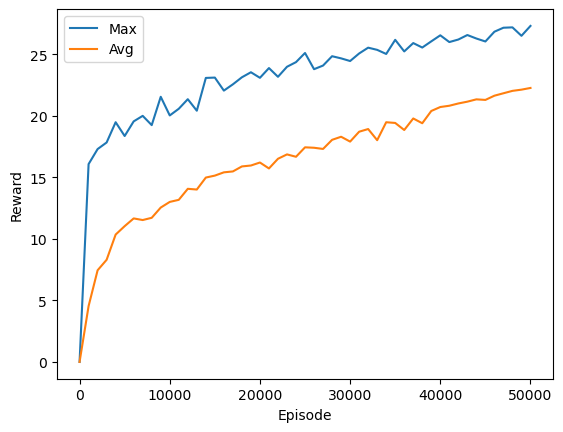

Solved in episode: 1 | Time: 0.05270648002624512
Episode: 1000 | Reward: 11.67005277668436 | Max reward: 20.993054707845072 | Time: 0.026885509490966797
Solved in episode: 1000
Episode: 2000 | Reward: 12.315349831432107 | Max reward: 20.00651339689892 | Time: 0.0317380428314209
Solved in episode: 2000
Episode: 3000 | Reward: 12.659907184342545 | Max reward: 19.73297446966172 | Time: 0.034125328063964844
Solved in episode: 3000
Episode: 4000 | Reward: 13.008229334702108 | Max reward: 20.34520804882051 | Time: 0.03410935401916504
Solved in episode: 4000
Episode: 5000 | Reward: 13.359418091326928 | Max reward: 20.448694825172435 | Time: 0.03909444808959961
Solved in episode: 5000
Episode: 6000 | Reward: 15.168186861276617 | Max reward: 22.452275405327494 | Time: 0.022591590881347656
Solved in episode: 6000
Episode: 7000 | Reward: 15.908530720099817 | Max reward: 23.446930646896384 | Time: 0.03658246994018555
Solved in episode: 7000
Episode: 8000 | Reward: 15.370118035301585 | Max reward: 

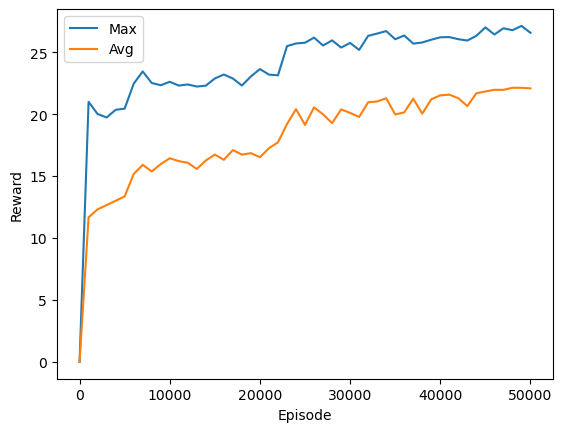

Solved in episode: 1 | Time: 0.08691620826721191
Episode: 1000 | Reward: 13.196852048585814 | Max reward: 21.985548337300624 | Time: 0.044289350509643555
Solved in episode: 1000
Episode: 2000 | Reward: 14.903358523758744 | Max reward: 22.00507501761119 | Time: 0.05697059631347656
Solved in episode: 2000
Episode: 3000 | Reward: 14.541443583878356 | Max reward: 22.254308760166182 | Time: 0.05082559585571289
Solved in episode: 3000
Episode: 4000 | Reward: 14.669222261173031 | Max reward: 22.59175350268682 | Time: 0.029619216918945312
Solved in episode: 4000
Episode: 5000 | Reward: 14.84998078117769 | Max reward: 21.599198977152493 | Time: 0.05168032646179199
Solved in episode: 5000
Episode: 6000 | Reward: 14.908835051109396 | Max reward: 21.578912933667517 | Time: 0.0421144962310791
Solved in episode: 6000
Episode: 7000 | Reward: 14.859178469950965 | Max reward: 21.31506562232972 | Time: 0.03890061378479004
Solved in episode: 7000
Episode: 8000 | Reward: 14.708011009121948 | Max reward: 2

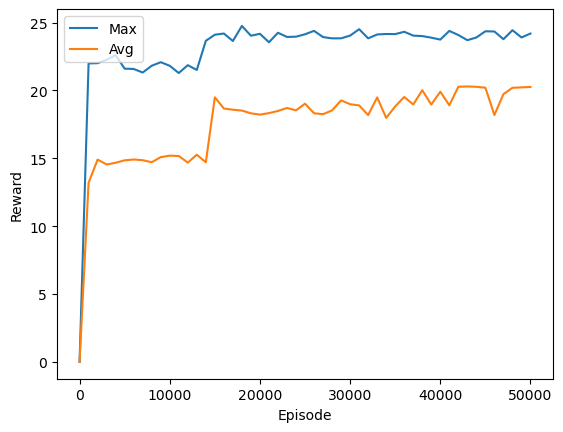

Solved in episode: 1 | Time: 0.029137611389160156
Episode: 1000 | Reward: 0.9809939472625725 | Max reward: 12.48658289512 | Time: 0.029257774353027344
Solved in episode: 1000
Episode: 2000 | Reward: 5.897940701817479 | Max reward: 12.997582157452921 | Time: 0.02504444122314453
Solved in episode: 2000
Episode: 3000 | Reward: 7.71228783095877 | Max reward: 14.345376193523412 | Time: 0.02910304069519043
Solved in episode: 3000
Episode: 4000 | Reward: 7.793915760616468 | Max reward: 13.91211559375129 | Time: 0.025130271911621094
Solved in episode: 4000
Episode: 5000 | Reward: 8.528656632602221 | Max reward: 15.53824077049893 | Time: 0.04819369316101074
Solved in episode: 5000
Episode: 6000 | Reward: 8.403208957910541 | Max reward: 15.536651412645991 | Time: 0.03962445259094238
Solved in episode: 6000
Episode: 7000 | Reward: 8.596367985308174 | Max reward: 15.167692502339694 | Time: 0.04866313934326172
Solved in episode: 7000
Episode: 8000 | Reward: 8.848474686245124 | Max reward: 15.701168

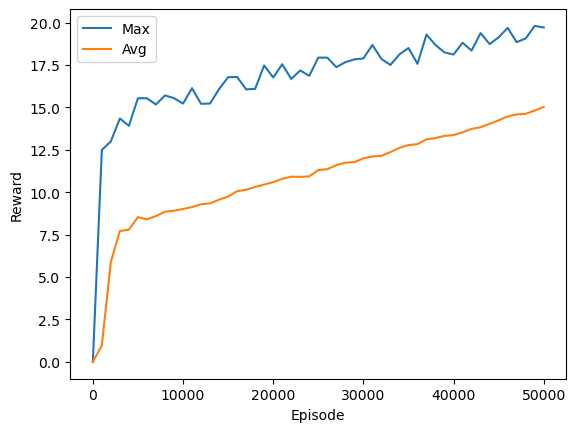

Solved in episode: 1 | Time: 0.06694936752319336
Episode: 1000 | Reward: 2.045301704419161 | Max reward: 18.336688180764522 | Time: 0.052153587341308594
Solved in episode: 1000
Episode: 2000 | Reward: 4.57177988475723 | Max reward: 18.436457713445048 | Time: 0.024680376052856445
Solved in episode: 2000
Episode: 3000 | Reward: 4.153791308324246 | Max reward: 21.359981944163636 | Time: 0.028118133544921875
Solved in episode: 3000
Episode: 4000 | Reward: 5.670519442599763 | Max reward: 23.279087642828635 | Time: 0.026171445846557617
Solved in episode: 4000
Episode: 5000 | Reward: 9.057280275467622 | Max reward: 24.6033006409804 | Time: 0.04163765907287598
Solved in episode: 5000
Episode: 6000 | Reward: 12.85741098949512 | Max reward: 25.320316801468536 | Time: 0.15184259414672852
Solved in episode: 6000
Episode: 7000 | Reward: 14.643697826089149 | Max reward: 24.147458473841354 | Time: 0.05325198173522949
Solved in episode: 7000
Episode: 8000 | Reward: 15.25792886958069 | Max reward: 24.7

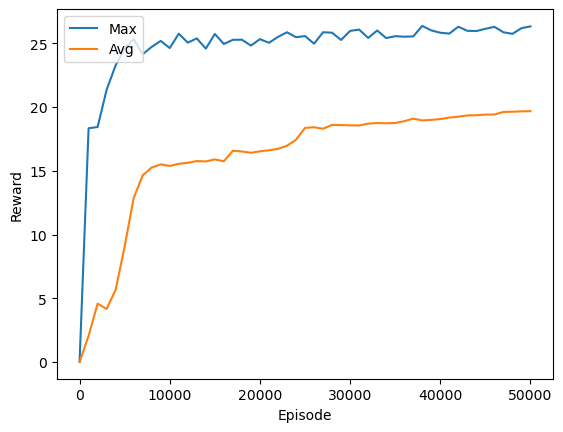

Solved in episode: 1 | Time: 0.03325605392456055
Episode: 1000 | Reward: 10.707606347774453 | Max reward: 21.603211164474498 | Time: 0.023075342178344727
Solved in episode: 1000
Episode: 2000 | Reward: 16.88821695178749 | Max reward: 21.97417447964352 | Time: 0.0165252685546875
Solved in episode: 2000
Episode: 3000 | Reward: 16.958587409357236 | Max reward: 22.169428169727336 | Time: 0.019710779190063477
Solved in episode: 3000
Episode: 4000 | Reward: 16.96278434378407 | Max reward: 21.679046650727603 | Time: 0.02910637855529785
Solved in episode: 4000
Episode: 5000 | Reward: 16.91904942999283 | Max reward: 22.00701723496121 | Time: 0.032579898834228516
Solved in episode: 5000
Episode: 6000 | Reward: 16.98043551117181 | Max reward: 22.462112009525303 | Time: 0.024001598358154297
Solved in episode: 6000
Episode: 7000 | Reward: 16.93811571215592 | Max reward: 21.955077946186083 | Time: 0.017104148864746094
Solved in episode: 7000
Episode: 8000 | Reward: 15.78907362550496 | Max reward: 21

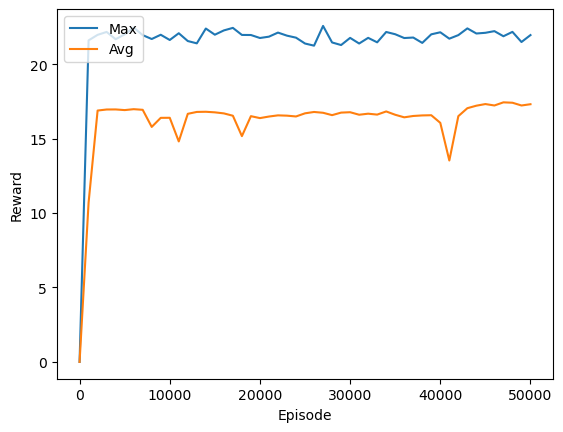

Solved in episode: 1 | Time: 0.10311269760131836
Episode: 1000 | Reward: -8.659820993232218 | Max reward: 15.806917051474267 | Time: 0.08791494369506836
Solved in episode: 1000
Episode: 2000 | Reward: -4.680990881298976 | Max reward: 14.966834386189788 | Time: 0.03034520149230957
Solved in episode: 2000
Episode: 3000 | Reward: 1.0102697526166913 | Max reward: 16.133600572745024 | Time: 0.11612963676452637
Solved in episode: 3000
Episode: 4000 | Reward: 6.603136988431218 | Max reward: 15.67055334647498 | Time: 0.05523943901062012
Solved in episode: 4000
Episode: 5000 | Reward: 8.390322229365498 | Max reward: 15.991649627685561 | Time: 0.03712749481201172
Solved in episode: 5000
Episode: 6000 | Reward: 8.922514241710296 | Max reward: 15.61959336201351 | Time: 0.05016613006591797
Solved in episode: 6000
Episode: 7000 | Reward: 9.270280332267282 | Max reward: 15.26899059613547 | Time: 0.04818296432495117
Solved in episode: 7000
Episode: 8000 | Reward: 9.63758424272139 | Max reward: 16.1538

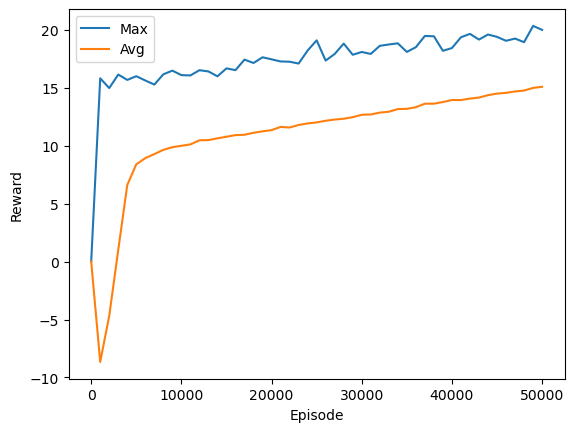

Solved in episode: 1 | Time: 0.15700984001159668
Episode: 1000 | Reward: -7.736738563577332 | Max reward: 18.78896752993267 | Time: 0.08334660530090332
Solved in episode: 1000
Episode: 2000 | Reward: -7.3934658644845 | Max reward: 19.35603310664497 | Time: 0.07386994361877441
Solved in episode: 2000
Episode: 3000 | Reward: -6.282418675671018 | Max reward: 18.85016898314161 | Time: 0.10266494750976562
Solved in episode: 3000
Episode: 4000 | Reward: -5.018051558720572 | Max reward: 18.760398526986446 | Time: 0.018906831741333008
Solved in episode: 4000
Episode: 5000 | Reward: 7.371165075103446 | Max reward: 19.52482839425406 | Time: 0.04311394691467285
Solved in episode: 5000
Episode: 6000 | Reward: 11.185394608092796 | Max reward: 19.15711104869844 | Time: 0.025023698806762695
Solved in episode: 6000
Episode: 7000 | Reward: 11.927547838687905 | Max reward: 19.128509362538683 | Time: 0.02564263343811035
Solved in episode: 7000
Episode: 8000 | Reward: 11.984165870447942 | Max reward: 19.5

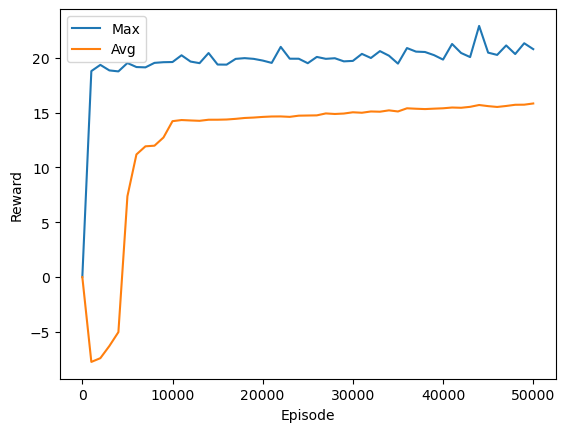

Solved in episode: 1 | Time: 0.0526270866394043
Episode: 1000 | Reward: -6.095092530399559 | Max reward: 21.13831371068955 | Time: 0.03046107292175293
Solved in episode: 1000
Episode: 2000 | Reward: -3.7775899138301594 | Max reward: 21.91948652267457 | Time: 0.039505958557128906
Solved in episode: 2000
Episode: 3000 | Reward: -4.761196876180673 | Max reward: 22.125360469023384 | Time: 0.04864096641540527
Solved in episode: 3000
Episode: 4000 | Reward: -4.880358451480667 | Max reward: 22.00724124908448 | Time: 0.03945350646972656
Solved in episode: 4000
Episode: 5000 | Reward: -4.978068929786487 | Max reward: 22.04974889755249 | Time: 0.05368399620056152
Solved in episode: 5000
Episode: 6000 | Reward: -4.064969487482057 | Max reward: 21.71820600827535 | Time: 0.05045580863952637
Solved in episode: 6000
Episode: 7000 | Reward: -3.9353633747373973 | Max reward: 21.821935772895824 | Time: 0.0697164535522461
Solved in episode: 7000
Episode: 8000 | Reward: -6.245298376939585 | Max reward: 22

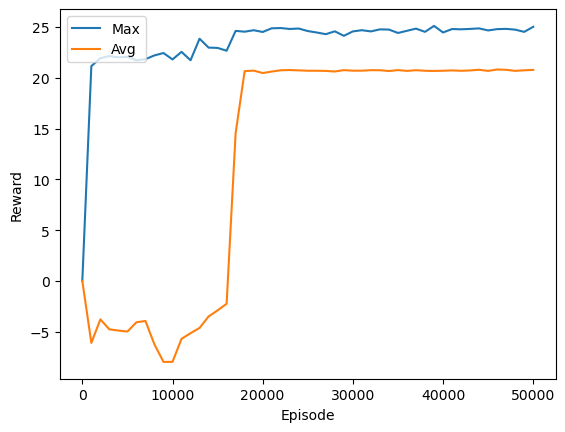

Best learning rate: 0.1, Best epsilon: 0.2


In [16]:
    
# Add a list of learning rates and epsilons to iterate over
learning_rates = [0.1, 0.01, 0.001]
epsilons = [0.2, 0.1, 0.05]

# Create dictionaries to store the performance for each pair of (lr, epsilon)
lr_eps_performance = {}

for lr in learning_rates:
    for epsilon in epsilons:
        # TRAINING
        q_table, bins = Qtable(len(env.observation_space.low), env.action_space.n)
        avg_reward = Q_learning(q_table, bins, lr_start=lr, epsilon_start=epsilon, gamma=0.99, episodes=50000, timestep=1000)
        
        # Store the average reward in the dictionary using (lr, epsilon) as the key
        lr_eps_performance[(lr, epsilon)] = avg_reward

# After the training, print out the best (lr, epsilon)
best_lr, best_epsilon = max(lr_eps_performance, key=lr_eps_performance.get)
print(f"Best learning rate: {best_lr}, Best epsilon: {best_epsilon}")
